In [5]:
import pylab as pl
import sys
sys.path.append("/auto/homes/fav25/jax/")
from SC_IPFP.sde_solvers import solve_sde_RK

import jax.numpy as np
# import jax

[-1.04153949]
[-2.31015677]
[-0.58592762]


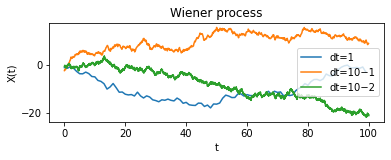

In [6]:
pl.subplot(211)  # Simple Wiener Process
alfa_wp = lambda X, t: np.array([0])
beta_wp = lambda X, t: np.array([1])
tWP1, YWP1 = solve_sde_RK(alfa=alfa_wp, beta=beta_wp, dt=1, N=100)
pl.plot(tWP1, YWP1[:, 0], label='dt=1')
# pl.show()
tWP2, YWP2 = solve_sde_RK(alfa=alfa_wp, beta=beta_wp, dt=.1, N=1000)
pl.plot(tWP2, YWP2[:, 0], label='dt=10−1')
# pl.show()
tWP3, YWP3 = solve_sde_RK(alfa=alfa_wp, beta=beta_wp, dt=.01, N=10000)
pl.plot(tWP3, YWP3[:, 0], label='dt=10−2')
# pl.show()

pl.title('Wiener process')
pl.xlabel('t')
pl.ylabel('X(t)')
pl.legend(loc='best')

[ 3.4 -1.3 28.3]


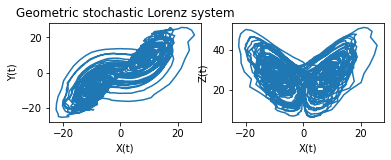

In [9]:
pl.subplot(212)  # Stochastic Lorenz Equation:
xL = lambda Y, t: 10.0 * (Y[1] - Y[0])
yL = lambda Y, t: 28.0 * Y[0] - Y[1] - Y[0] * Y[2]
zL = lambda Y, t: Y[0] * Y[1] - 8.0/3.0 * Y[2]
alfa_sl = lambda Y, t: np.array([xL(Y, t), yL(Y, t), zL(Y, t)])
beta_sl = lambda Y, t: np.array([0.5*Y[1], 1, 1])
Y0 = [3.4, -1.3, 28.3]
tSLE, YSLE = solve_sde_RK(alfa=alfa_sl, beta=beta_sl, X0=Y0, dt=0.01, N=5000)
# pl.plot(t, Y[:,0], label='X(t)')
# pl.plot(t, Y[:,1], label='Y(t)')
# pl.plot(t, Y[:,2], label='Z(t)')
pl.subplot(223)
pl.plot(YSLE[:, 0], YSLE[:, 1])
pl.xlabel('X(t)')
pl.ylabel('Y(t)')
pl.title('Geometric stochastic Lorenz system')
pl.subplot(224)
pl.plot(YSLE[:, 0], YSLE[:, 2])
pl.xlabel('X(t)')
pl.ylabel('Z(t)')
pl.show()